In [19]:
import pandas as pd

%matplotlib inline

In [20]:
df = pd.read_excel("/Users/jnesnky/AMBER ELIZABETH  9-4H.xlsx")

In [21]:
df.head()

,Unnamed: 0,ReportDate,API_WELLNO,FileNo,Company,WellName,Quarter,Section,Township,Range,...,Pool,Oil,Wtr,Days,Runs,Gas,GasSold,Flared,Lat,Long
0,411673,2016-01-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1334,1080,31,1347,1129,917,150,47.820239,-104.005077
1,364481,2016-02-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1144,1096,29,1069,2396,2215,123,47.820239,-104.005077
2,209403,2016-03-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1101,1202,31,1229,2196,1803,331,47.820239,-104.005077
3,115337,2016-04-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1096,955,30,1009,1832,1446,326,47.820239,-104.005077
4,85217,2016-05-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1054,885,31,1083,1973,1664,247,47.820239,-104.005077


In [22]:
df["ReportDate"] = pd.to_datetime(df["ReportDate"])

In [23]:
df.head()

,Unnamed: 0,ReportDate,API_WELLNO,FileNo,Company,WellName,Quarter,Section,Township,Range,...,Pool,Oil,Wtr,Days,Runs,Gas,GasSold,Flared,Lat,Long
0,411673,2016-01-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1334,1080,31,1347,1129,917,150,47.820239,-104.005077
1,364481,2016-02-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1144,1096,29,1069,2396,2215,123,47.820239,-104.005077
2,209403,2016-03-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1101,1202,31,1229,2196,1803,331,47.820239,-104.005077
3,115337,2016-04-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1096,955,30,1009,1832,1446,326,47.820239,-104.005077
4,85217,2016-05-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1054,885,31,1083,1973,1664,247,47.820239,-104.005077


In [24]:
from fbprophet import Prophet

In [25]:
df1 = df[["ReportDate", "Oil"]]

In [26]:


df1.columns = ["ds", "y"]

m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=12)
future.tail()

,ds
55,2019-12-09
56,2019-12-10
57,2019-12-11
58,2019-12-12
59,2019-12-13


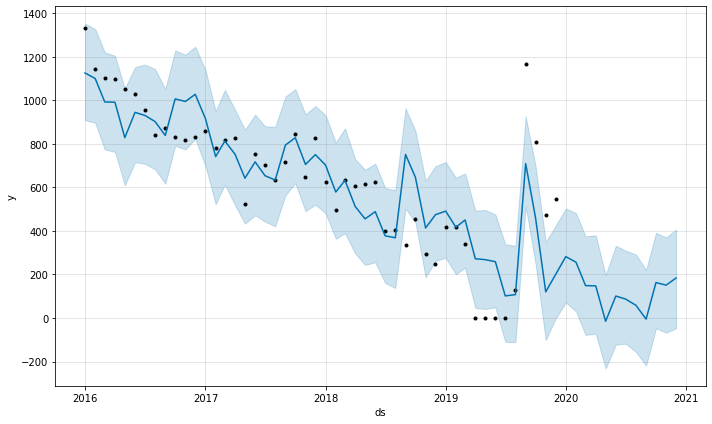

In [28]:
future = m.make_future_dataframe(periods=12, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
55,2020-08-01,58.669687,-177.634158,256.079276
56,2020-09-01,-4.959560,-232.997605,211.991656
57,2020-10-01,162.887977,-37.343159,400.501144
58,2020-11-01,151.120375,-70.291781,363.937440
59,2020-12-01,183.928233,-37.965777,396.521646


In [49]:
import plotly.graph_objs as go

def timeseries(df, x, yhat, lower, upper, actual, save = False):

    fig = go.Figure([
        go.Scatter(
            name='Measurement',
            x=df[x],
            y=df['yhat'],
            mode='lines',
            line=dict(color='rgb(31, 119, 180)'),
            showlegend=False
        ),
        go.Scatter(
            name='Upper Bound',
            x=df[x],
            y=df[upper],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        ),
        go.Scatter(
            name='Lower Bound',
            x=df[x],
            y=df[lower],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty',
            showlegend=False
        )
    ])
    fig.update_layout(
        yaxis_title='Production Rate',
        title='Unemployment rate estimate using Prophet Forecast',
        hovermode="x"
    )
    fig.add_trace(go.Scatter(x=actual['ds'], y=actual["y"],
                    mode='lines+markers',
                    name='Actual values',
                    showlegend=False))
  
    fig.add_trace(go.Scatter(x=df[x], y=df["curve"],
                    mode='lines+markers',
                    name='Actual values',
                    showlegend=False))   
    
    fig.show()
    
    if save: 
        fig.write_html("unemployment rate.html")

In [50]:
timeseries(forecast,'ds', 'yhat', 'yhat_lower', 'yhat_upper', actual = df1, save = True)

In [18]:
# Import pandas (DataFrames), SciPy (optimization functions), and matplotlib (plotting).
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

# Creating some functions we can use to calcuate the hyperbolic curve and initial max production level
def hyperbolic_equation(t, qi, b, di):
    return qi/((1.0+b*di*t)**(1.0/b)) 

def get_max_initial_production(df, number_first_months, variable_column, date_column):
    df=df.sort_values(by=date_column)
    df_beginning_production=df.head(number_first_months)
    return df_beginning_production[variable_column].max()


In [32]:
df.head()

,Unnamed: 0,ReportDate,API_WELLNO,FileNo,Company,WellName,Quarter,Section,Township,Range,...,Pool,Oil,Wtr,Days,Runs,Gas,GasSold,Flared,Lat,Long
0,411673,2016-01-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1334,1080,31,1347,1129,917,150,47.820239,-104.005077
1,364481,2016-02-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1144,1096,29,1069,2396,2215,123,47.820239,-104.005077
2,209403,2016-03-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1101,1202,31,1229,2196,1803,331,47.820239,-104.005077
3,115337,2016-04-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1096,955,30,1009,1832,1446,326,47.820239,-104.005077
4,85217,2016-05-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,BAKKEN,1054,885,31,1083,1973,1664,247,47.820239,-104.005077


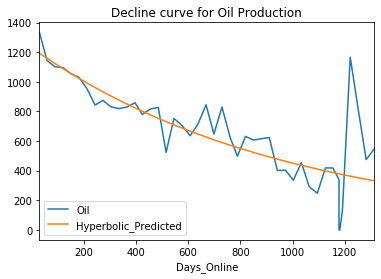

In [41]:

# Reading the data into Python and saving it as a Pandas DataFrame
desired_product_type='Oil' # or 'Gas'
    


# Evaluating the decline curve and saving it as a column in the DataFrame called "Hyperbolic Predicted"
qi=get_max_initial_production(df, 5, desired_product_type, 'ReportDate')
popt_hyp, pcov_hyp=curve_fit(hyperbolic_equation, df['Days_Online'], 
                                    df[desired_product_type],bounds=(0, [qi,2,20]))
df.loc[:,'Hyperbolic_Predicted']=hyperbolic_equation(df['Days_Online'], *popt_hyp)

# Plotting the actual and predicted production values
df.plot(x='Days_Online', y=[desired_product_type, "Hyperbolic_Predicted"], 
                                    title=f"Decline curve for {desired_product_type} Production")

In [45]:
forecast["curve"] = df['Hyperbolic_Predicted']

TypeError: cannot perform __rmul__ with this index type: DatetimeIndex

In [39]:
df.head()

,Unnamed: 0,ReportDate,API_WELLNO,FileNo,Company,WellName,Quarter,Section,Township,Range,...,Oil,Wtr,Days,Runs,Gas,GasSold,Flared,Lat,Long,Hyperbolic_Predicted
0,411673,2016-01-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,1334,1080,31,1347,1129,917,150,47.820239,-104.005077,643.645697
1,364481,2016-02-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,1144,1096,29,1069,2396,2215,123,47.820239,-104.005077,643.645697
2,209403,2016-03-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,1101,1202,31,1229,2196,1803,331,47.820239,-104.005077,643.645697
3,115337,2016-04-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,1096,955,30,1009,1832,1446,326,47.820239,-104.005077,643.645697
4,85217,2016-05-01,33053000000000,23537,WHITING OIL AND GAS CORPORATION,AMBER ELIZABETH 9-4H,SESW,9,150,104,...,1054,885,31,1083,1973,1664,247,47.820239,-104.005077,643.645697


In [40]:
df['Days_Online'] = df["Days"].cumsum()

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,curve
0,2016-01-01,1090.563692,881.932874,1341.509116,1090.563692,1090.563692,35.227149,35.227149,35.227149,35.227149,35.227149,35.227149,0.0,0.0,0.0,1125.790841,1193.706569
1,2016-02-01,1072.661302,888.422557,1332.807520,1072.661302,1072.661302,27.486489,27.486489,27.486489,27.486489,27.486489,27.486489,0.0,0.0,0.0,1100.147791,1158.990071
2,2016-03-01,1055.913905,775.969051,1203.196129,1055.913905,1055.913905,-63.253405,-63.253405,-63.253405,-63.253405,-63.253405,-63.253405,0.0,0.0,0.0,992.660500,1123.029294
3,2016-04-01,1038.011515,776.386078,1226.585050,1038.011515,1038.011515,-46.684550,-46.684550,-46.684550,-46.684550,-46.684550,-46.684550,0.0,0.0,0.0,991.326965,1089.323852
4,2016-05-01,1020.686621,608.976714,1034.873224,1020.686621,1020.686621,-191.998647,-191.998647,-191.998647,-191.998647,-191.998647,-191.998647,0.0,0.0,0.0,828.687974,1055.589842
5,2016-06-01,1002.784231,717.884405,1166.270944,1002.784231,1002.784231,-58.069818,-58.069818,-58.069818,-58.069818,-58.069818,-58.069818,0.0,0.0,0.0,944.714414,1023.969532
6,2016-07-01,985.459338,695.146488,1142.456140,985.459338,985.459338,-54.813245,-54.813245,-54.813245,-54.813245,-54.813245,-54.813245,0.0,0.0,0.0,930.646092,992.320444
7,2016-08-01,967.556948,682.709330,1118.720399,967.556948,967.556948,-65.198878,-65.198878,-65.198878,-65.198878,-65.198878,-65.198878,0.0,0.0,0.0,902.358069,961.679547
8,2016-09-01,949.654558,619.869536,1073.865935,949.654558,949.654558,-110.927260,-110.927260,-110.927260,-110.927260,-110.927260,-110.927260,0.0,0.0,0.0,838.727297,932.955843
9,2016-10-01,932.329664,782.102510,1238.416738,932.329664,932.329664,74.243696,74.243696,74.243696,74.243696,74.243696,74.243696,0.0,0.0,0.0,1006.573360,904.203300
